In [2]:
import pandas as pd
data = pd.read_csv("data/file.csv", encoding='latin-1')

In [3]:
data

,Year,Area,avg_temp,Item_x,Element_x,Unit_x,yield_amound,Domain,Element_y,Item_y,Unit_y,pesticide_amound
0,1990,Ghana,26.73,Asses,Stocks,Head,10398.00,Pesticides Use,Agricultural Use,Pesticides (total),tonnes,65.8
1,1990,Ghana,26.73,Asses,Stocks,Head,10398.00,Pesticides Use,Agricultural Use,Insecticides,tonnes,32.4
2,1990,Ghana,26.73,Asses,Stocks,Head,10398.00,Pesticides Use,Agricultural Use,Herbicides,tonnes,8.0
3,1990,Ghana,26.73,Asses,Stocks,Head,10398.00,Pesticides Use,Agricultural Use,Fungicides and Bactericides,tonnes,25.0
4,1990,Ghana,26.73,Asses,Stocks,Head,10398.00,Pesticides Use,Agricultural Use,Fungicides Ã¢ÂÂ Seed treatments,tonnes,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15893010,2013,Namibia,20.73,Vegetables Primary,Production,tonnes,60587.49,Pesticides Use,Agricultural Use,Insecticides,tonnes,9.0
15893011,2013,Namibia,20.73,Vegetables Primary,Production,tonnes,60587.49,Pesticides Use,Agricultural Use,Herbicides,tonnes,17.0
15893012,2013,Namibia,20.73,Vegetables Primary,Production,tonnes,60587.49,Pesticides Use,Agricultural Use,Fungicides and Bactericides,tonnes,18.0
15893013,2013,Namibia,20.73,Vegetables Primary,Production,tonnes,60587.49,Pesticides Use,Agricultural Use,Plant Growth Regulators,tonnes,4.0


In [37]:
datas = data.drop_duplicates(subset=['Area', 'Year'], keep='last')
datas = datas[datas["Area"] == "Portugal"]
datas = datas[["Year", "yield_amound"]]
datas["Year"] = datas["Year"].astype("float")

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller,acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from pylab import rcParams

In [24]:
datas['Year'] = pd.to_datetime(datas['Year'], format='%Y')

In [20]:
datas['Years']  = datas['Year'].astype('datetime64[Y]'
)


In [38]:
datas

,Year,yield_amound
13467407,1990.0,2131993.00
13472633,1991.0,1815295.17
13477859,1992.0,1539904.27
13482482,1993.0,2000773.99
13487105,1994.0,2036585.00
13492934,1995.0,2093742.42
13498562,1996.0,2152945.39
13500170,1997.0,1965391.12
13505999,1998.0,2290839.85
13511627,1999.0,2282327.49


Text(0.5, 1.0, 'Trend of the Time Series')

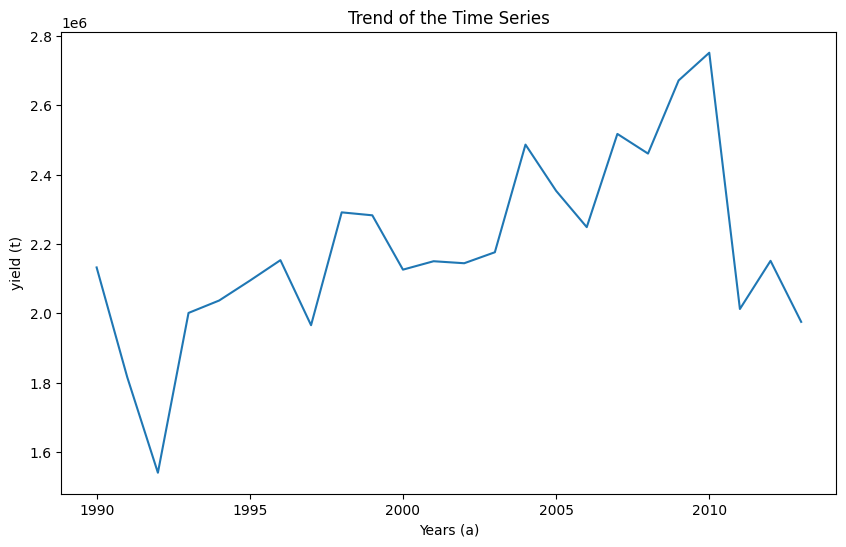

In [46]:
plt.figure(figsize= (10,6))
plt.plot(datas["Year"], datas["yield_amound"])
plt.xlabel('Years (a)')
plt.ylabel('yield (t)')
plt.title('Trend of the Time Series')

In [29]:
def stationarity_test(timeseries):
    # Get rolling statistics for window = 12 i.e. yearly statistics
    rolling_mean = timeseries.rolling(window = 12).mean()
    rolling_std = timeseries.rolling(window = 12).std()
    
    # Plot rolling statistic
    plt.figure(figsize= (10,6))
    plt.xlabel('Years')
    plt.ylabel('No of Air Passengers')    
    plt.title('Stationary Test: Rolling Mean and Standard Deviation')
    plt.plot(timeseries, color= 'blue', label= 'Original')
    plt.plot(rolling_mean, color= 'green', label= 'Rolling Mean')
    plt.plot(rolling_std, color= 'red', label= 'Rolling Std')   
    plt.legend()
    plt.show()
    
    # Dickey-Fuller test
    print('Results of Dickey-Fuller Test')
    df_test = adfuller(timeseries)
    df_output = pd.Series(df_test[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in df_test[4].items():
        df_output['Critical Value (%s)' %key] = value
    print(df_output)

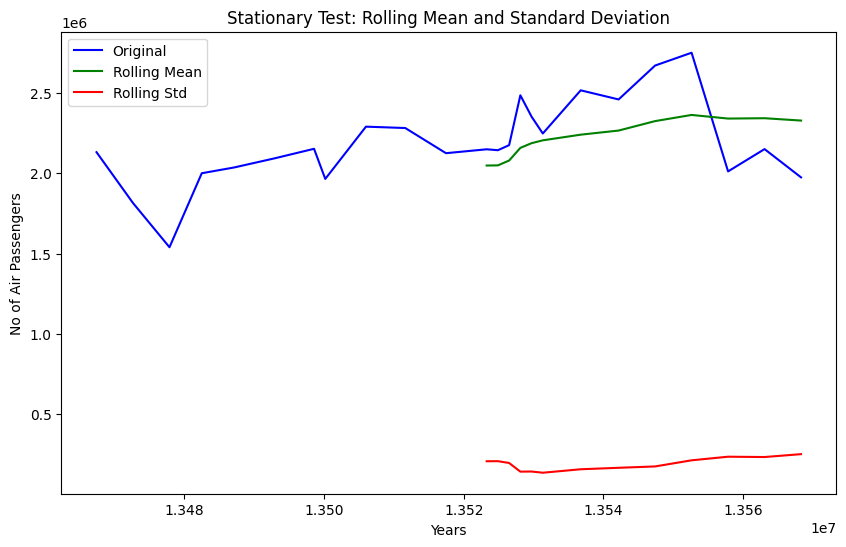

Results of Dickey-Fuller Test
Test Statistic                 -2.517007
p-value                         0.111391
#Lags Used                      9.000000
Number of Observations Used    14.000000
Critical Value (1%)            -4.012034
Critical Value (5%)            -3.104184
Critical Value (10%)           -2.690987
dtype: float64


In [49]:
stationarity_test(datas["yield_amound"])